> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate no-show appointments data 


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this no-show appointment data, there are tons of records of the patients.Those records includes that kinds of disease patient suffers from, scheduled day, appointment day and so on. I am going to clean the data and investigate how the gap days between scheduled data and appointment days, age, gender influence on the final result.


Research Question 1 (what is the waiting time distribution? )


Research Question 2 (are people who wait longer time more likely to miss the appoitment? )


Research Question 3 (for each single gap days, the probality of people missing appointment?)


In [8]:
# Use this cell to set up import statements for all of the packages that you
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

data issues:

ScheduledDay, AppointmentDay are not in datetime format
some of 'age' column value is negative, this is an error.
when I calulate gap days (waiting time), there are some values less than negative one, which means AppointmentDay is much earlier than ScheduledDay. This is wrong! PS: negative one represents Appointment and Schedule is on the same day.
the symbol,'-', of No-Show shold be removed.

### General Properties

In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [10]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
df.shape

(110527, 14)

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning 1 (transform date to the datetime format)

why:
I am going to calculate waiting time, datetime format would be convenient.

how:
to_datetime method in pandas could be helpful.

In [15]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])

### Result:

In [16]:
df['AppointmentDay'].head(1)

0   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

In [17]:
df['ScheduledDay'].head(1)

0   2016-04-29 18:38:08
Name: ScheduledDay, dtype: datetime64[ns]

### Data Cleaning2 (eliminate the flawed value in age column)

why: minimum age is -1, which does not make sense.

how: screen the age column, which age is larger than 0.

In [18]:
df = df[df['Age']>=0]

### result

In [19]:
df['Age'].min()

0

### Data Cleaning (calculate the gap between schedule day and appointment day and eliminate error values)

why: 
1. to calculate waiting time, this is an important factor I am going to do the analysis.
2. there are some values less than negative one, which means AppointmentDay is much earlier than ScheduledDay. This is wrong! PS: negative one represents Appointment and Schedule is on the same day.


how:
1. do the minus operation between AppointmentDay and ScheduledDay
2. through the '.days' method of datetime to extract waiting time in day unit.
3. remove the waiting time less than negative 1.

In [20]:
df['Gap_days']= df['AppointmentDay']-df['ScheduledDay']

In [21]:
df['Gap_days'].head(5)

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
Name: Gap_days, dtype: timedelta64[ns]

In [22]:
df['Gap_days']= df['Gap_days'].apply(lambda x: x.days)

In [23]:
df['Gap_days'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Gap_days, dtype: float64

In [24]:
df = df[df['Gap_days']>=-1]

### Result

In [25]:
df['Gap_days'].describe()

count    110521.000000
mean          9.184345
std          15.255153
min          -1.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Gap_days, dtype: float64

In [26]:
df['Gap_days'].head(10)

0   -1
1   -1
2   -1
3   -1
4   -1
5    1
6    1
7    1
8   -1
9    1
Name: Gap_days, dtype: int64

### Data Cleaning (rename column 'No-show'as 'NoShow')

Data Cleaning (rename column 'No-show'as 'NoShow')

why: when I did the data analysis, the "-" can produce an error.

how: rename the column withou "-".

In [27]:
df.rename(columns={'No-show':'NoShow'},inplace=True)

### result

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110521 non-null float64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns]
AppointmentDay    110521 non-null datetime64[ns]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
NoShow            110521 non-null object
Gap_days          110521 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 13.5+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1  what is distribution of waiting days?

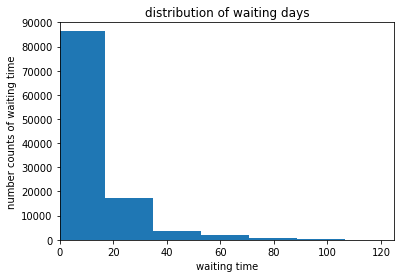

In [29]:
plt.hist( df['Gap_days'])


plt.xlabel('waiting time')
plt.ylabel('number counts of waiting time')
plt.title('distribution of waiting days')
plt.axis([0, 125,0,90000])

plt.show()

### Reasoning

I use the bar chart here to see how total appointments distributed by waiting days.

For distribution of waiting days, most patients (both show and no-show patients) are concentrated between 0 and 25 days of waiting time.


### Research Question 2  (are people who wait longer time more likely to miss the appoitment? )

In [30]:
people_no_show_gap_days = df.query('NoShow == "Yes"')['Gap_days']

In [31]:
people_no_show_gap_days_dataframe = pd.DataFrame(people_no_show_gap_days)

In [32]:
list_gapdays = people_no_show_gap_days_dataframe['Gap_days'].unique()
list_gapdays.sort()

In [33]:
value_counts_missing = []

for i in list_gapdays:
    value_counts_missing.append(people_no_show_gap_days_dataframe['Gap_days'].value_counts()[i])

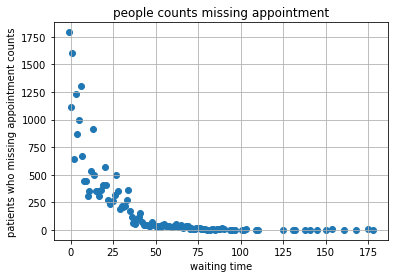

In [34]:
plt.scatter(list_gapdays,value_counts_missing)

plt.xlabel('waiting time')
plt.ylabel('patients who missing appointment counts')
plt.title('people counts missing appointment')
plt.grid(True)


plt.show()

### Reasoning
I use the plot chart to see the distribution of missing appointment by waiting days.

It seems like most of the missing appointments are within 0-50 waiting days. So if we want to decrease the total amount of missing appointments, we should focus on appointments with 0-50 waiting days.


### Research Question 3 (for each single gap days, the probality of people missing appointment?)

In [35]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
value_counts = []
for i in list_gapdays:
    value_counts.append(df['Gap_days'].value_counts()[i])
    
probality  = list(np.array(value_counts_missing)/np.array(value_counts))
print(probality)

[0.046470618743841084, 0.21350469978898906, 0.23821561338289962, 0.23529411764705882, 0.23270321361058602, 0.26609703997558742, 0.24795640326975477, 0.26681614349775784, 0.28730703259005147, 0.27414330218068533, 0.31631919482386772, 0.3161094224924012, 0.31659192825112109, 0.31866825208085614, 0.31342258839684173, 0.33399866932801064, 0.30495221546481321, 0.31616982836495033, 0.30558276199804113, 0.34770114942528735, 0.34372367312552654, 0.30897367006985493, 0.34441602728047743, 0.33576642335766421, 0.37781350482315113, 0.40188383045525905, 0.359781121751026, 0.31589338598223099, 0.29484173505275496, 0.32690541781450871, 0.265625, 0.32738095238095238, 0.35153583617747441, 0.33433734939759036, 0.33415841584158418, 0.37279335410176534, 0.31034482758620691, 0.3595166163141994, 0.34170854271356782, 0.3235294117647059, 0.40551181102362205, 0.35380116959064328, 0.36930455635491605, 0.29921259842519687, 0.29936305732484075, 0.36496350364963503, 0.36363636363636365, 0.30275229357798167, 0.2905

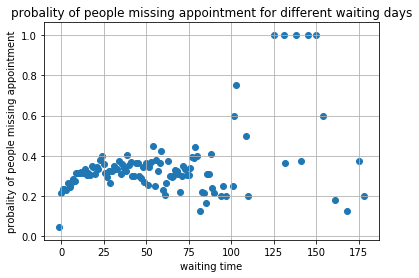

In [36]:
plt.scatter(list_gapdays,probality)

plt.xlabel('waiting time')
plt.ylabel('probality of people missing appointment')
plt.title('probality of people missing appointment for different waiting days')
plt.grid(True)



plt.show()

### Reasoning for Q3
I use the plot chart here to see to see the relationship between waiting days and probality of people missing appointment.

With gap day around 0 to 75 days, the probality of break appoinment is around 20% to 40%. With gap days more than 100 days,people more likely to miss their appointment.

<a id='conclusions'></a>
## Conclusions


In this project, I investigate three different factors could influence on the appointment promise.

1. For distribution of waiting days, most patients (both show and no-show patients) are concentrated between 0 and 25 days of waiting time.



2. it seems like most of the missing appointments are within 0-50 waiting days. So if we want to decrease the total amount of missing appointments, we should focus on appointments with 0-50 waiting days.


3. With gap day around 0 to 75 days, the probality of break appoinment is around 20% to 40%. With gap days more than 100 days,people more likely to miss their appointment.


### Limitations
data sufficient constrain: the longer waiting time, people has higher chance to be self-healing, they would like to cancel their appointment. This kind of factor would influence on the conclusion.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0